In [1]:
import nest
import numpy
import matplotlib.pyplot as plt


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0-post0.dev0
 Built: Jul 13 2025 01:06:24

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:

nest.Install("iomodule")


Jul 14 18:18:24 Install [Info]: 
    loaded module iomodule


In [3]:
number_of_neurons = 3
neurons = nest.Create("eglif_cond_alpha_multisyn", number_of_neurons)
neurons.set({
        "V_m": -45,
        "E_L": -45,
        "C_m": 189,
        "tau_m": 11,
        "I_e": -18.101,
        "k_adap": 1.928,
        "k_1": 0.191,
        "k_2": 0.090909,

        # V Threshold, Refractory Period and Escape rate
        "V_th": -35,
        "t_ref": 1,
        "tau_V": 0.8,
        "lambda_0": 1.2,

        # Reset on Spike
        "V_reset": -45,
        "A1": 1810.923,
        "A2": 1358.197,

        # Postsynaptic receptor
        "tau_syn1": 1,
        "tau_syn2": 60,
        "E_rev1": 0,
        "E_rev2": -80,
        })

vm = nest.Create("voltmeter", params={"interval": 0.1})
nest.Connect(vm, neurons, "all_to_all")


nest.Connect(
    neurons, neurons, {"rule": "all_to_all", "allow_autapses": False}, {"synapse_model": "gap_junction", "weight": 1}
)

In [4]:
dc_generator = nest.Create("dc_generator", params={"start": 500, "stop": 550, "amplitude": 20 })
nest.Connect(dc_generator, neurons[0])

In [5]:
nest.Simulate(5000.0)


Jul 14 18:18:25 NodeManager::prepare_nodes [Info]: 
    Preparing 5 nodes for simulation.

Jul 14 18:18:25 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 5
    Simulation time (ms): 5000
    Number of OpenMP threads: 1
    Number of MPI processes: 1

Jul 14 18:18:25 SimulationManager::run [Info]: 
    Simulation finished.


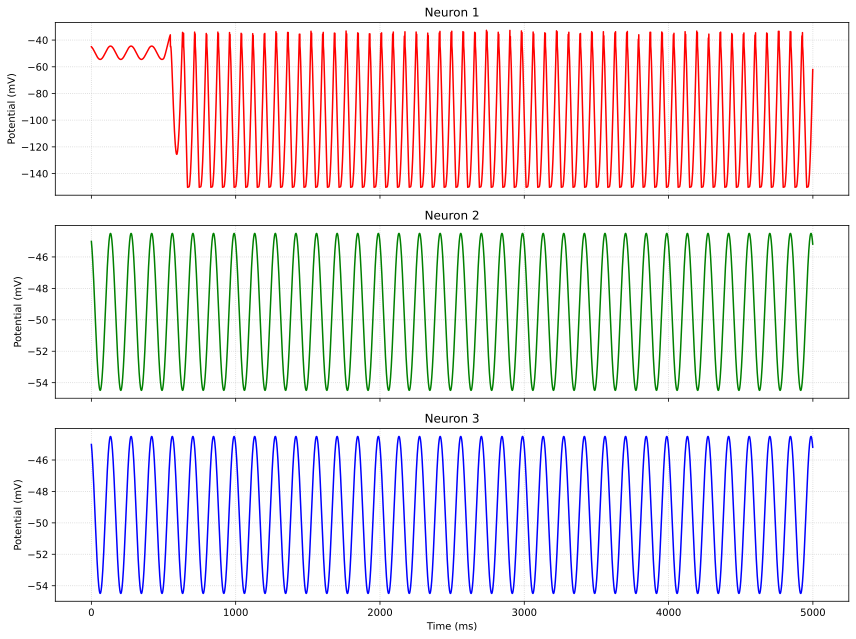

In [6]:
senders = vm.events["senders"]
times = vm.events["times"]
v_m_values = vm.events["V_m"]

# Create separate plots for each neuron
fig, axes = plt.subplots(number_of_neurons, 1, figsize=(12, 3*number_of_neurons), sharex=True)
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k'] * (number_of_neurons // 7 + 1)  # Cycle colors if needed

for i in range(number_of_neurons):
    neuron_id = i + 1  # NEST neuron IDs start at 1
    mask = numpy.where(senders == neuron_id)
    
    # Plot the membrane potential for this neuron
    axes[i].plot(times[mask], v_m_values[mask], f"{colors[i]}-", linewidth=1.5)
    axes[i].set_ylabel("Potential (mV)")
    axes[i].set_title(f"Neuron {neuron_id}")
    
    # Add a grid for better readability
    axes[i].grid(True, linestyle=':', alpha=0.6)
    
# Add a common x-label
axes[-1].set_xlabel("Time (ms)")

# Adjust layout
plt.tight_layout()
plt.show()
